In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot,add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

import graphviz

import matplotlib.font_manager as fm
path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()

matplotlib.rc('font', family=fontprop)
matplotlib.rc('axes', unicode_minus = False)

# ---------------------------------------------------------------------------------
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import r2_score


In [5]:
df_raw = pd.read_csv("/home/piai/바탕화면/빅데이터/2. Big Data 분석/DIABETES.csv",
                     encoding = 'euc-kr')
df_raw.head()

Y  AGE  GENDER   BMI     BP  CHOLESTEROL    LDL   HDL  TCH     LTG  \
0  151   59       2  32.1  101.0          157   93.2  38.0  4.0  4.8598   
1   75   48       1  21.6   87.0          183  103.2  70.0  3.0  3.8918   
2  141   72       2  30.5   93.0          156   93.6  41.0  4.0  4.6728   
3  206   24       1  25.3   84.0          198  131.4  40.0  5.0  4.8903   
4  135   50       1  23.0  101.0          192  125.4  52.0  4.0  4.2905   

   GLUCOSE  
0       87  
1       69  
2       85  
3       89  
4       80

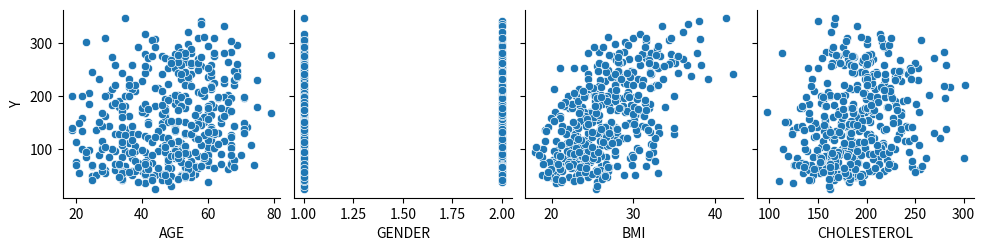

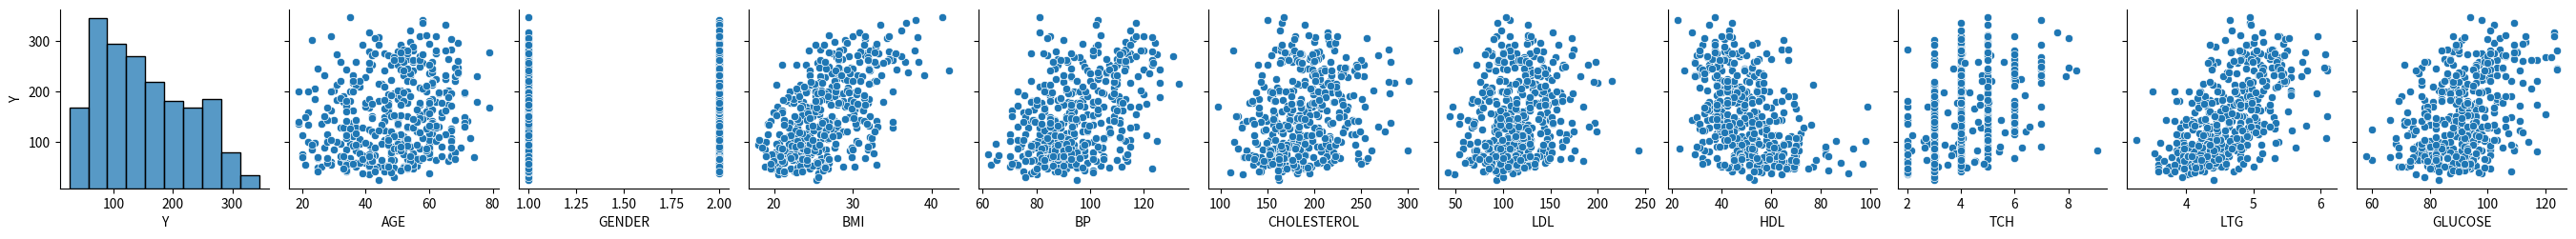

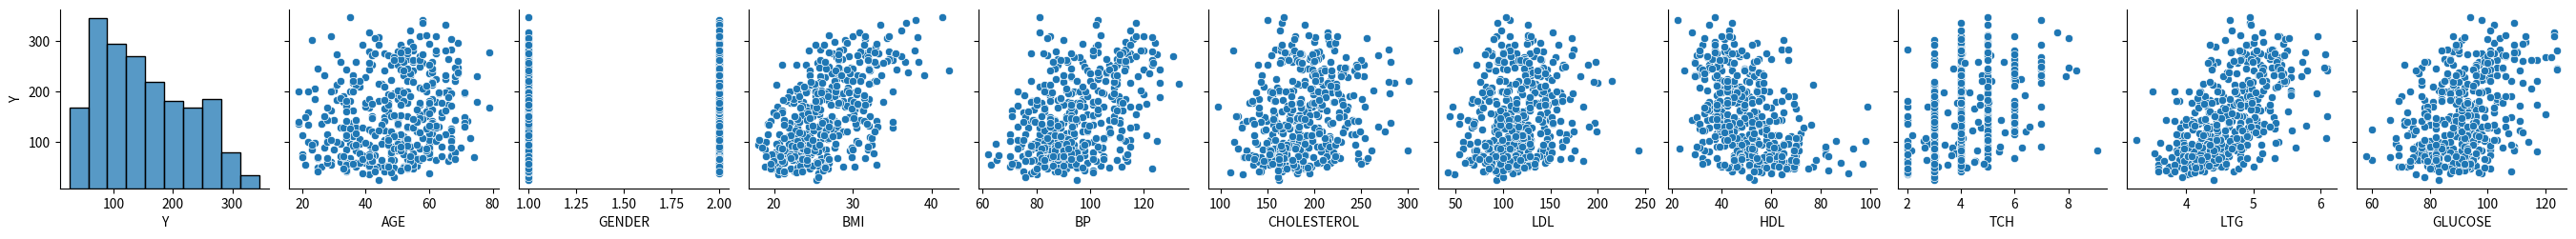

In [13]:
sns.pairplot(df_raw, y_vars="Y")
plt.show()

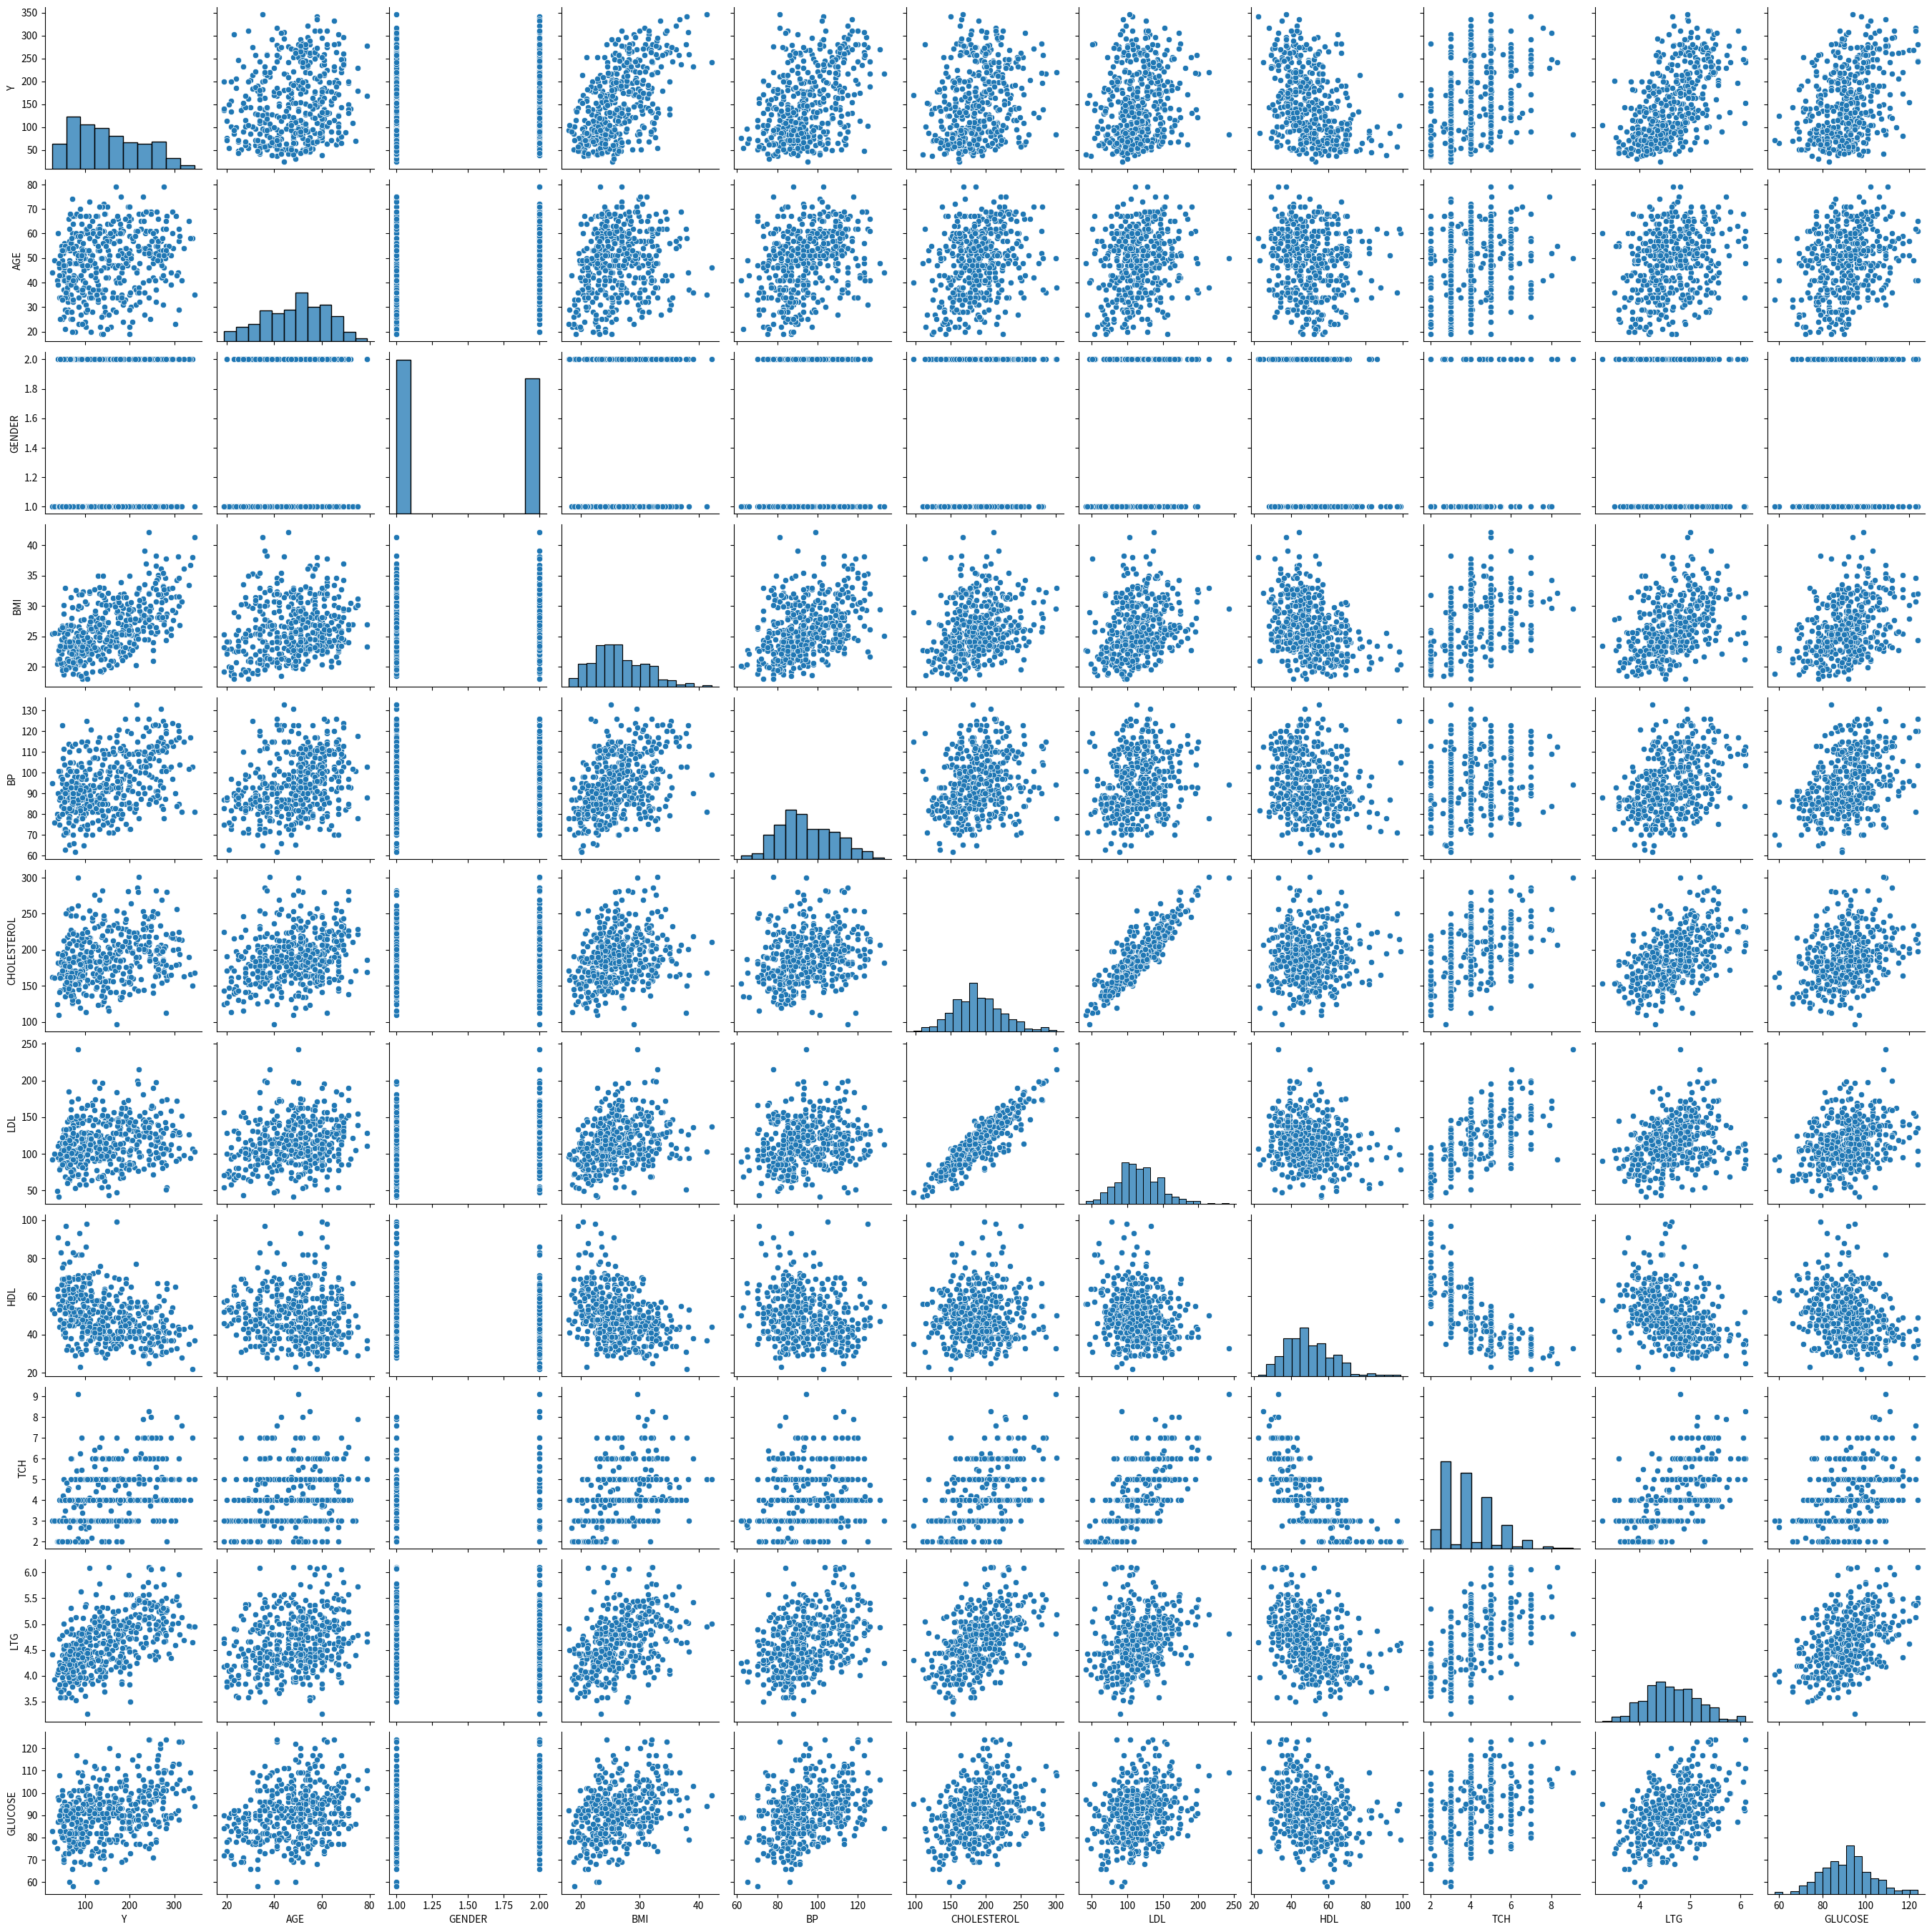

In [15]:
sns.pairplot(df_raw)
plt.show()

In [16]:
df_raw.corr().round(3)

Y    AGE  GENDER    BMI     BP  CHOLESTEROL    LDL    HDL  \
Y            1.000  0.188   0.043  0.586  0.441        0.212  0.174 -0.395   
AGE          0.188  1.000   0.174  0.185  0.335        0.260  0.219 -0.075   
GENDER       0.043  0.174   1.000  0.088  0.241        0.035  0.143 -0.379   
BMI          0.586  0.185   0.088  1.000  0.395        0.250  0.261 -0.367   
BP           0.441  0.335   0.241  0.395  1.000        0.242  0.186 -0.179   
CHOLESTEROL  0.212  0.260   0.035  0.250  0.242        1.000  0.897  0.052   
LDL          0.174  0.219   0.143  0.261  0.186        0.897  1.000 -0.196   
HDL         -0.395 -0.075  -0.379 -0.367 -0.179        0.052 -0.196  1.000   
TCH          0.430  0.204   0.332  0.414  0.258        0.542  0.660 -0.738   
LTG          0.566  0.271   0.150  0.446  0.393        0.516  0.318 -0.399   
GLUCOSE      0.382  0.302   0.208  0.389  0.390        0.326  0.291 -0.274   

               TCH    LTG  GLUCOSE  
Y            0.430  0.566    0.382  
AGE          0.204  0.271    0.302  
GENDER       0.332  0.150    0.208  
BMI          0.414  0.446    0.389  
BP           0.258  0.393    0.390  
CHOLESTEROL  0.542  0.516    0.326  
LDL          0.660  0.318    0.291  
HDL         -0.738 -0.399   -0.274  
TCH          1.000  0.618    0.417  
LTG          0.618  1.000    0.465  
GLUCOSE      0.417  0.465    1.000

In [36]:
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234)
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (309, 11)
test data size : (133, 11)


In [40]:
# feature_names = ['AGE', 'BMI', 'BP', 'CHOLESTEROL', 'LDL', 'HDL', 'TCH',
#        'LTG', 'GLUCOSE']

# feature_names = [name for name in feature_names] + ['C(GENDER)']
# reg_model=smf.ols(formula="Y~0 + " + "+".join(feature_names),data=df_raw)
# #적합
# reg_result=reg_model.fit()
# print(reg_result.summary())

In [52]:
reg_model = smf.ols(formula = "Y ~ 0 + AGE+ C(GENDER) + BMI + BP + CHOLESTEROL + LDL +\
HDL + TCH + LTG + GLUCOSE", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.527
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     33.24
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           5.68e-43
Time:                        17:10:32   Log-Likelihood:                -1668.9
No. Observations:                 309   AIC:                             3360.
Df Residuals:                     298   BIC:                             3401.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(GENDER)[1]  -361.7306     86.030     -4.205   

In [53]:
df_train_x = df_train.drop('Y', axis=1)
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i)\
                for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF", ascending = True).round(2)

variable     VIF
1           AGE    1.22
2        GENDER    1.23
4            BP    1.46
3           BMI    1.49
10      GLUCOSE    1.52
8           TCH    8.76
9           LTG   10.49
7           HDL   16.56
6           LDL   38.83
5   CHOLESTEROL   60.66
0         const  777.84

In [54]:
reg_model = smf.ols(formula = "Y ~ 0 + AGE+ C(GENDER) + BMI + BP + LDL +\
HDL + TCH + LTG + GLUCOSE", data = df_train)
# CHOLESTEROL  삭제
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     36.64
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           2.18e-43
Time:                        17:10:36   Log-Likelihood:                -1669.8
No. Observations:                 309   AIC:                             3360.
Df Residuals:                     299   BIC:                             3397.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(GENDER)[1]  -263.8177     45.399     -5.811   

In [55]:
df_train_x = df_train.drop(['Y', 'CHOLESTEROL'], axis=1)
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i)\
                for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF", ascending = True).round(2)

variable     VIF
1      AGE    1.22
2   GENDER    1.23
4       BP    1.45
3      BMI    1.49
9  GLUCOSE    1.52
8      LTG    2.16
5      LDL    2.70
6      HDL    3.57
7      TCH    7.55
0    const  225.32

In [56]:
reg_model = smf.ols(formula = "Y ~ 0 + AGE+ C(GENDER) + BMI + BP + LDL +\
HDL  + LTG + GLUCOSE", data = df_train)
# CHOLESTEROL  + TCH 삭제
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     41.31
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           3.55e-44
Time:                        17:11:14   Log-Likelihood:                -1669.9
No. Observations:                 309   AIC:                             3358.
Df Residuals:                     300   BIC:                             3391.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(GENDER)[1]  -260.6738     44.682     -5.834   

In [57]:
df_train_x = df_train.drop(['Y', 'CHOLESTEROL', 'TCH'], axis=1)
df_train_x_const = add_constant(df_train_x)
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i)\
                for i in range(df_train_x_const.shape[1])]
df_vif.sort_values("VIF", ascending = True).round(2)

variable     VIF
5      LDL    1.19
1      AGE    1.22
2   GENDER    1.23
4       BP    1.43
6      HDL    1.45
3      BMI    1.48
8  GLUCOSE    1.49
7      LTG    1.59
0    const  219.84

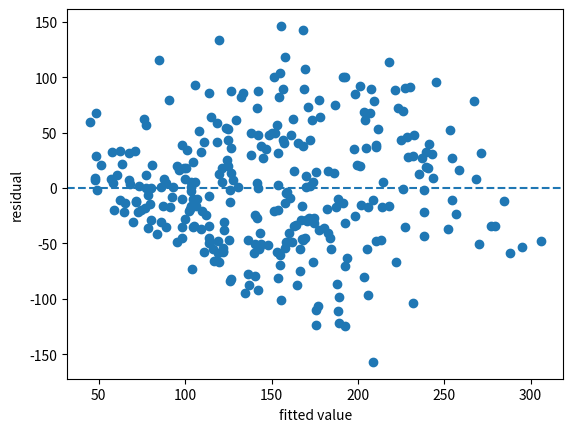

In [58]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y=0, linestyle = "--")
plt.show()

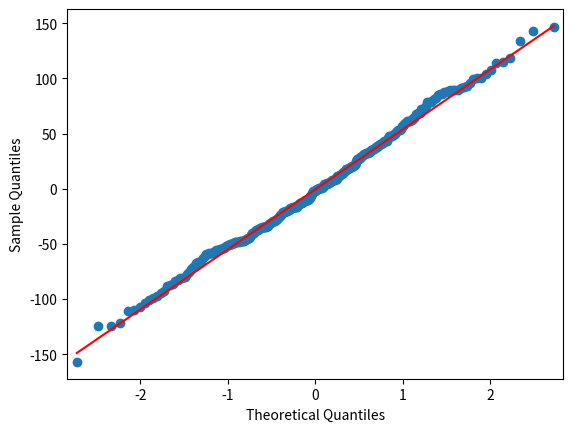

In [59]:
qqplot(reg_result.resid, line = "q")
plt.show()

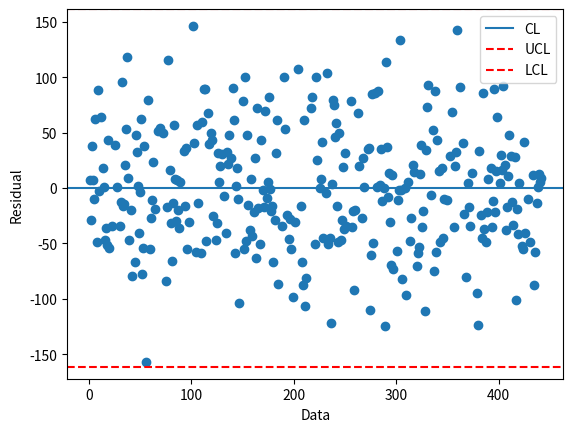

In [60]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data")
plt.ylabel("Residual")
plt.axhline(y=0, linestyle="-", label="CL")
plt.axhline(y = 3*np.std(reg_result.resid), linestyle = "--", color="red",label = 'UCL')
plt.axhline(y = -3*np.std(reg_result.resid), linestyle = "dashed", color="red",label = 'LCL')
plt.legend();
plt.show()

In [61]:
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train['Y'], train_pred))
print("test data의 결정계수:", r2_score(df_test['Y'], test_pred))

train data의 결정계수: 0.5241784037459518
test data의 결정계수: 0.4814308273690352


In [73]:
df_train_y = df_train["Y"]
df_train_x = df_train.drop('Y', axis=1)

model = LinearRegression()

rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)

selected_cols = df_train_x.columns[rfe.support_]
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Varialbes :{}".format(selected_cols))
print("Removed Varialbes :{}".format(removed_cols))

Selected Varialbes :Index(['GENDER', 'BMI', 'BP', 'TCH', 'LTG'], dtype='object')
Removed Varialbes :Index(['AGE', 'CHOLESTEROL', 'LDL', 'HDL', 'GLUCOSE'], dtype='object')


In [74]:
rfe_reg_model = smf.ols(formula =  "Y ~ 0+ C(GENDER) + BMI + BP + TCH + LTG", data = df_train)

rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     61.23
Date:                Mon, 31 Oct 2022   Prob (F-statistic):           5.75e-44
Time:                        17:14:24   Log-Likelihood:                -1676.7
No. Observations:                 309   AIC:                             3365.
Df Residuals:                     303   BIC:                             3388.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
C(GENDER)[1]  -335.8794     33.343    -10.073   

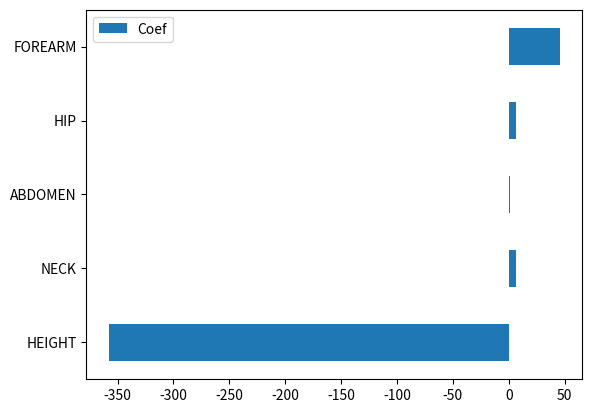

In [77]:
df_reg_coef = pd.DataFrame({"Coef":rfe_reg_result.params.values[1:]},
                          index = ['HEIGHT', 'NECK', 'ABDOMEN', 'HIP', 'FOREARM'])
df_reg_coef.plot.barh(y= "Coef")
plt.show()

In [79]:
#  page 85

In [84]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

df_raw = pd.read_csv("/home/piai/바탕화면/빅데이터/2. Big Data 분석/DIABETES.csv",
                     encoding = 'euc-kr')
df_raw.head()

Y  AGE  GENDER   BMI     BP  CHOLESTEROL    LDL   HDL  TCH     LTG  \
0  151   59       2  32.1  101.0          157   93.2  38.0  4.0  4.8598   
1   75   48       1  21.6   87.0          183  103.2  70.0  3.0  3.8918   
2  141   72       2  30.5   93.0          156   93.6  41.0  4.0  4.6728   
3  206   24       1  25.3   84.0          198  131.4  40.0  5.0  4.8903   
4  135   50       1  23.0  101.0          192  125.4  52.0  4.0  4.2905   

   GLUCOSE  
0       87  
1       69  
2       85  
3       89  
4       80

In [82]:
df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis=1, inplace = False)
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y,
                                                               test_size = 0.3, random_state = 1234)

print("train data X size: {}".format(df_train_x.shape))
print("train data Y size: {}".format(df_train_y.shape))

print("test data X size: {}".format(df_test_x.shape))
print("test data Y size: {}".format(df_test_y.shape))

train data X size: (309, 10)
train data Y size: (309,)
test data X size: (133, 10)
test data Y size: (133,)


In [83]:
ridge = Ridge(random_state= 1234, alpha=1)
ridge.fit(df_train_x, df_train_y)

print(ridge.intercept_)

-306.7161295761696


In [87]:
df_first = pd.get_dummies(df_raw, columns=['GENDER'])
df_first

Y  AGE   BMI      BP  CHOLESTEROL    LDL   HDL   TCH     LTG  GLUCOSE  \
0    151   59  32.1  101.00          157   93.2  38.0  4.00  4.8598       87   
1     75   48  21.6   87.00          183  103.2  70.0  3.00  3.8918       69   
2    141   72  30.5   93.00          156   93.6  41.0  4.00  4.6728       85   
3    206   24  25.3   84.00          198  131.4  40.0  5.00  4.8903       89   
4    135   50  23.0  101.00          192  125.4  52.0  4.00  4.2905       80   
..   ...  ...   ...     ...          ...    ...   ...   ...     ...      ...   
437  178   60  28.2  112.00          185  113.8  42.0  4.00  4.9836       93   
438  104   47  24.9   75.00          225  166.0  42.0  5.00  4.4427      102   
439  132   60  24.9   99.67          162  106.6  43.0  3.77  4.1271       95   
440  220   36  30.0   95.00          201  125.2  42.0  4.79  5.1299       85   
441   57   36  19.6   71.00          250  133.2  97.0  3.00  4.5951       92   

     GENDER_1  GENDER_2  
0           0         1  
1           1         0  
2           0         1  
3           1         0  
4           1         0  
..        ...       ...  
437         0         1  
438         0         1  
439         0         1  
440         1         0  
441         1         0  

[442 rows x 12 columns]